In [14]:
%reset
%matplotlib inline


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

plt.rc('text', usetex=True)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Critical values

$\lambda_* = \frac{m-(1+\rho)}{\rho(1+\rho)+m(2+\rho)}$ (eqs. 1 and B4)

$\lambda^* = \frac{m-(1+\rho)}{(1+\rho)(1+2\rho)}$ (eq. B5)

$\bar{\lambda} = \frac{m(1-q)^2-(1-q^2)(1+\rho)}{(1+q)(1+\rho)(1+q+2\rho)}$ (eq. B28)

$m_* = (1+\rho)\left[1+\lambda (1+2\rho)\right]$ (eq. 2)

$m^* = \frac{(1+\rho)(1+q)\left[1-q+\lambda(1+q+2\rho)\right]}{(1-q)^2}$ (eq. 3)

$\underline{m} = 1+\rho$ (eq. B48)

$\overline{m} = \frac{(1+\rho)(1-q^2)}{(1-q)^2}$ (eq. B49)

$\hat{\lambda} = \frac{1}{2+\rho}$ (eq. B47)

$\tilde{m} = \frac{3+q(2-q)(1+\rho)(1+2\rho)+\rho (5+2\rho)}{2(1-q)^2(2+\rho)} + \frac{(1+\rho)\sqrt{(1+q)^2 \left[1+q(10-7q)\right]+8 q(1+q)\left[4-q(1+q)\right]\rho+16 q \left[1+q(1-q)\right]\rho^2}}{2(1-q)^2(2+\rho)}$

$\tilde{\lambda} = \frac{q(2+3q+4\rho)-1}{2(1+q)(2+\rho)(1+q+2\rho)}
 + \frac{\sqrt{1+q(12+14q+16 \rho(2+\rho)+8 q \rho (3+2 \rho)-q^3(7+8 \rho)-4(q+2 q \rho)^2)}}{2(1+q)(2+\rho)(1+q+2\rho)} $

In [15]:
def lambdasubstar(m,rho):
    return (m-(1.+rho))/(rho*(1.+rho)+m*(2.+rho))

def lambdasuperstar(m,rho):
    return (m-(1.+rho))/((1.+rho)*(1.+2.*rho))

def lambdabar(m,rho,q):
    return (m*(1.-q)**2-(1.-q**2)*(1.+rho))/((1.+q)*(1.+rho)*(1.+q+2.*rho))

def msubstar(l,rho):
    return (1.+rho)*(1.+l*(1.+2.*rho))

def msuperstar(l,rho,q):
    return (1.+rho)*(1.+q)*(1.-q+l*(1.+q+2.*rho))/(1.-q)**2

def munderline(rho):
    return 1.+rho

def moverline(rho,q):
    return (1.+rho)*(1.-q**2)/(1.-q)**2

def lambdahat(rho):
    return 1./(2.+rho)

def mtilde(rho,q):
    return (3.+q*(2.-q)*(1.+rho)*(1.+2.*rho)+rho*(5.+2.*rho))/(2.*(1.-q)**2*(2.+rho))+(1.+rho)*np.sqrt((1.+q)**2*(1.+q*(10.-7.*q))+8.*q*(1.+q)*(4.-q*(1.+q))*rho+16.*q*(1.+q*(1.-q))*rho**2)/(2.*(1.-q)**2*(2.+rho))

def lambdatilde(rho,q):
    return (q*(2+3*q+4*rho)-1+np.sqrt(1+q*(12+14*q+16*rho*(2+rho)+8*q*rho*(3+2*rho)-q**3*(7+8*rho)-4*(q+2*q*rho))))/(2*(1+q)*(2+rho)*(1+q+2*rho))

### Non-trivial rest points

* Rest point R along the TP edge:

$\mathrm{R} = (x_\mathrm{R},0, 1-x_\mathrm{R})$, where the proportion of traders is given by $x_\mathrm{R}$. For $\lambda = 1$ this critical proportion of traders is given by

$x_\mathrm{R} = \frac{(1+\rho)\left[2(1+\rho)^2+(3+2\rho)m\right]}{m(2+m+2\rho)}$ (eq. B6)

while for $0 < \lambda < 1$ it is given by

$x_\mathrm{R} = \frac{\zeta-\eta \sqrt{\theta}}{\iota}$ (eq. B7), where

$\zeta = m^3 -(2+\rho-5 \lambda - 4 \lambda \rho) m^2-(1+\rho)(1-7 \lambda + 4 \lambda^2 + \rho -4 \lambda \rho + \lambda^2 \rho)m +(1-\lambda)(1+\rho)^2(2+\rho+\lambda \rho)$ (eq. B8a)

$\eta = (1+m+\rho)\left[m-(1-\lambda)(1+\rho)\right]$ (eq. B8b)

$\theta = \left[m-(2+\rho+\lambda \rho)\right]^2 + 8 \lambda (1+\rho) m$ (eq. B8c)

$\iota = 4 \lambda(1-\lambda) (1+\rho) m$ (eq. B8d)

* Rest point S along the HP edge:

$\mathrm{S} = (0,y_\mathrm{S},1-y_\mathrm{S})$, where the proportion of providers is given by

$y_\mathrm{S} = 1-\frac{(1+\lambda \rho)(1+m+\rho)}{2m(1-\lambda)}$ (eq. B25)

* Rest point Q along the TH edge:

$\mathrm{Q} = (x_\mathrm{Q}, 1-x_\mathrm{Q},0)$ , where the proportion of traders is given by

$x_\mathrm{Q} = \frac{-\epsilon + \sqrt{\epsilon^2-4 \delta \phi}}{2 \delta}$ (eq. B29), with

$\delta = \frac{q^2(1-\lambda)}{1+\rho}$ (eq. B30a)

$\epsilon = \frac{m(1-q)^2-2q(1+\rho)\left[q+\lambda(1-q+\rho)\right]}{2(1+\rho)^2}$ (eq. B30b)

$\phi = -\frac{(1-q)\left\{m(1-q)+(1+\rho)\left[1+q+\lambda(1-q+2\rho)\right]\right\}}{4(1+\rho)^2}$ (eq. B30c)

In [16]:
def xR(m,l,rho): # proportion of traders at R
    if l==1:
        return (1+rho)*(2*(1+rho)**2+(3+2*rho)*m)/(m*(2+m+2*rho))
    else:
        zeta = m**3-(2.+rho-5.*l-4.*l*rho)*m**2-(1.+rho)*(1.-7.*l+4.*l**2+rho-4.*l*rho+l**2*rho)*m+(1.-l)*(1+rho)**2*(2.+rho+l*rho)
        eta = (1.+m+rho)*(m-(1.-l)*(1.+rho))
        theta = (m-(2.+rho+l*rho))**2+8.*l*(1.+rho)*m
        iota = 4.*l*(1.-l)*(1.+rho)*m
        return (zeta-eta*np.sqrt(theta))/iota

def yS(m,l,rho): # proportion of providers at S 
    return 1.-(1.+l*rho)*(1.+m+rho)/(2.*m*(1.-l))

def xQ(m,l,rho,q): # proportion of traders at Q
    delta = q**2*(1.-l)/(1.+rho)
    eps = (m*(1.-q)**2-2.*q*(1.+rho)*(q+l*(1.-q+rho)))/(2.*(1.+rho)**2)
    phi = -(1.-q)*(m*(1.-q)+(1.+rho)*(1.+q+l*(1.-q+2.*rho)))/(4.*(1.+rho)**2)
    return (-eps+np.sqrt(eps**2-4.*delta*phi))/(2.*delta)

The five dynamical regions:

1. $m < m_*$.
2. $\lambda > \lambda_*$ and $m_* < m < m^*$
3. $\lambda > \lambda_*$ and $m > m^*$
4. $\lambda < \lambda_*$ and $m > m^*$
5. $\lambda < \lambda_*$ and $m_* < m < m^*$  

In [17]:
def which_region(m,l,rho,q):
    """
    Checks conditions for belonging to a given region and returns label
    """
    if m <= msubstar(l,rho):
        return 1
    elif (l > lambdasubstar(m,rho)) & (m > msubstar(l,rho)) & (m < msuperstar(l,rho,q)):
        return 2
    elif (l > lambdasubstar(m,rho)) & (m > msuperstar(l,rho,q)):
        return 3
    elif (l <= lambdasubstar(m,rho)) & (m > msuperstar(l,rho,q)):
        return 4
    else: 
        return 5

### Replicator dynamics

The proportion of different strategies change over time according to the replicator dynamics (eq. A21):

$\dot{x} = x \left(w_\mathrm{T}-\bar{w}\right)$

$\dot{y} = y \left(w_\mathrm{H}-\bar{w}\right)$

$\dot{z} = z \left(w_\mathrm{P}-\bar{w}\right)$

In [18]:
#define function of x=[x0,x1,x2] and t to plot dynamics on simplex
def replicator_dynamics(x,t,params):
    """
    Function coding the replicator dynamics
    x = [x0,x1,x2] vector of strategy shares
    (x[0]: proportion of traders, x[1]: proportion of withholders, x[2]: proportion of providers)
    t = time
    params = [m, l, rho, q]
    """
    
    # get parameters
    m = params[0] # encounter rate
    l = params[1] # mating availability
    rho = params[2] # egg senescence rate
    q = params[3] # probability of traders detecting withholders

    ye = x[1]/(1.+rho) # equilibrium proportion of providers carrying eggs
    ze = x[2]/(1.+m+rho) # equilibrium proportion of providers carrying eggs

    a = m+(1.+rho)*(1.-l)
    b = m*(ze+(1.-q)*ye) + (1+rho)*(l+(1.-l)*(ze+ye))-(1.-l)*x[0]
    c = -(l+(1.-l)*(ze+ye))*x[0]

    xe = (-b+np.sqrt(b**2-4*a*c))/(2*a) # # equilibrium proportion of traders carrying eggs

    e = xe+ye+ze # equilibrium proportion of individuals carrying eggs
    alpha = e-q*ye
    beta = l+(1.-l)*e
    gamma = xe+(1.-l)*ze
    
    wT = beta*(alpha+gamma)/(beta*(1.+rho)+m*alpha) # fitness of traders
    wH = (gamma-q*xe)/(1.+rho) # fitness of withholders
    wP = (beta+gamma)/(1.+m+rho) # fitness of providers

    wbar = x[0]*wT+x[1]*wH+x[2]*wP # average fitness
    
    x0dot=x[0]*(wT-wbar) # replicator dynamic for traders
    x1dot=x[1]*(wH-wbar) # replicator dynamic for withholders
    x2dot=x[2]*(wP-wbar) # replicator dynamic for providers
        
    return [x0dot,x1dot,x2dot]

The following cell defines functions to plot the dynamics in the simplex (e.g. the small panels in fig. 1), and to plot the dynamical regions (e.g., the large panel in fig. 1).

In [19]:
def plot_dynamics(
    ax,
    m=15.0,
    l=0.8,
    rho=0.0,
    q=0.5,
    plot_type = 'triangle',
    steps=10000,
    trajectoryspecs = [[[0.6,0.0,0.4],1000,50],
                       [[.03,0.0,.97],1000,50],
                       [[.05,.95,0.0],1000,600],
                       [[.95,0.05,0.0],1000,900],
                       [[.01,.91,.08],1000,375],
                       [[0.01,0.95,0.04],1000,500],
                       [[.01,.97,.02],1000,600],
                       [[.01,.98,.01],1000,700], 
                       [[0.04,0.95,0.01],1000,600],
                       [[0,0.8,0.2],1000,200]],
    head_width_arrows = .065,
    edge_labels = ['R', 'Q'],
    x_edge_labels = [0.39, .225],
    y_edge_labels = [.825, -.05],
    fontsize=15,
    backgroundcolor = 'gray'
):
    """
    Plot the simplex together with rest points and solution trajectories
    ax = axes object
    m = encounter rate
    l = mating availability
    rho = rate of egg senescence
    q = probability of withholder detection (by traders)
    plot_type = either 'triangle' (for dynamics on the edges and the interior),
                'TH-edge' (dynamics only on the TH-edge),
                'TP-edge',
                or 'HP-edge'
    steps = number of 'simulation' steps
    trajectoryspecs = array of arrays specifying the trajectories to plot.
                      Each array has the form [[x0,y0,z0],t,arrow_pos], where
                      [x0,y0,z0] gives the initial condition,
                      t is the maximum time,
                      and arrow_pos indicates the position of the arrow (in units of 'steps') 
    head_width_arrows = arrows' head widths
    edge_labels = array of labels for non-trivial rest points
    x_edge_labels = x coordinates for the edge_labels
    y_edge_labels = y coordinates for the edge_labels
    fontsize = font size for labels
    backgroundcolor = background color    
    """
        
    # define the projection to triangular coordinates
    proj = np.array(
        [
            [
                -1 * np.cos(30. / 360. * 2. * np.pi),
                np.cos(30. / 360. * 2. * np.pi),
                0.
            ],
            [
                -1 * np.sin(30. / 360. * 2. * np.pi),
                -1 * np.sin(30. / 360. * 2. * np.pi),
                1.,
            ],
        ]
    )

    # define the vertices and edges of the simplex
    trianglepoints = np.hstack([np.identity(3), np.array([[1.], [0.], [0.]])])
    triangleline = np.dot(proj, trianglepoints)

    # clean up the plot to make it look nice
    ax.set_xlim([triangleline[0, 0] - 0.1, triangleline[0, 1] + 0.1])
    ax.set_ylim([-0.5 - 0.1, 1.1])
    ax.axis("off")
    ax.set_aspect(1)
    
    # collect parameters
    params = [m,l,rho,q]

    # calculate trajectories and plot them
    for i in range(len(trajectoryspecs)):
        # create the clock to time the simulations
        t = np.linspace(0.0, trajectoryspecs[i][1], steps)
        # solve the ode and project to triangular coordinates
        yout = odeint(replicator_dynamics, trajectoryspecs[i][0], t, args=(params,))

        plot_values = np.dot(proj, yout.T)
        xx = plot_values[0]
        yy = plot_values[1]

        # plot the path each initial condition takes through the simplex
        ax.plot(xx, yy, color = 'k', lw=1)
        
        ind_arrows = trajectoryspecs[i][2]
    
        # plot arrow shafts
        ax.plot(xx[: ind_arrows + 1],
                yy[: ind_arrows + 1],
                linewidth=0.5,
                color="k",
                zorder=3)

        # arrow heads
        ax.arrow(xx[ind_arrows],
                 yy[ind_arrows],
                 xx[ind_arrows + 1] - xx[ind_arrows],
                 yy[ind_arrows + 1] - yy[ind_arrows],
                 facecolor = 'k',
                 shape = "full",
                 lw = 0,
                 length_includes_head = True,
                 head_width = head_width_arrows,
                 edgecolor="k"
        )

    # plot the simplex edges
    ax.plot(triangleline[0],triangleline[1],clip_on=False,color="black",linewidth=1.5,zorder=9)
    
    # add background color
    ax.fill_between(triangleline[0], triangleline[1], 1, facecolor = backgroundcolor, interpolate=True, alpha = 0.3)
    
    # trivial equilibria to be plotted depending on plot_type
    if plot_type == 'triangle':
        eqs = np.array([[1, 0, 0], # T
                        [0,1,0], # H
                        [0,0,1]]) # P
    elif plot_type == 'TH-edge':
        eqs = np.array([[1, 0, 0], # T
                        [0,1,0]]) # H
    elif plot_type == 'TP-edge':
        eqs = np.array([[1, 0, 0], # T
                        [0,0,1]]) # P
    else: # plot_type == 'HP-edge'
        eqs = np.array([[0, 1, 0], # H
                        [0,0,1]]) # P
        
    # check which dynamical region
    region = which_region(m,l,rho,q)
    
    if region==1:            
        # no edge equilibria
        if plot_type == 'triangle':
            stability_flags = np.array([False, False, True])
        elif plot_type == 'TH-edge':
            stability_flags = np.array([True, False])
        elif plot_type == 'TP-edge':
            stability_flags = np.array([False, True])
        else: # plot_type == 'HP-edge'
            stability_flags = np.array([False, True])
    elif region==2:
        x1 = xR(m,l,rho) # R
        if plot_type == 'triangle':
            eqs= np.vstack([eqs,[x1,0,1.-x1]]) # add R
            stability_flags = np.array([True, False, True, False])
        elif plot_type == 'TH-edge':
            stability_flags = np.array([True, False])
        elif plot_type == 'TP-edge':
            eqs= np.vstack([eqs,[x1,0,1.-x1]]) # add R
            stability_flags = np.array([True, True, False])
        else: # plot_type == 'HP-edge'
            stability_flags = np.array([False, True])
    elif region==3:
        x1 = xR(m,l,rho) # R
        x2 = xQ(m,l,rho,q) # Q
        if plot_type == 'triangle':
            eqs= np.vstack([eqs,[x1,0,1.-x1]]) # add R
            eqs = np.vstack([eqs,[x2,1.-x2,0]]) # add Q                    
            stability_flags = np.array([False, False, True, False, True])
        elif plot_type == 'TH-edge':
            eqs = np.vstack([eqs,[x2,1.-x2,0]]) # add Q                                
            stability_flags = np.array([False,False,True])
        elif plot_type == 'TP-edge':
            eqs= np.vstack([eqs,[x1,0,1.-x1]]) # add R
            stability_flags = np.array([True, True, False])
        else: # plot_type == 'HP-edge'
            stability_flags = np.array([False, True])
    elif region==4:
        y1 = yS(m,l,rho) # S
        x2 = xQ(m,l,rho,q) # Q
        if plot_type == 'triangle':
            eqs = np.vstack([eqs,[0,y1,1.-y1]]) # add S        
            eqs = np.vstack([eqs,[x2,1.-x2,0]]) # add Q
            stability_flags = np.array([False, False, False, False, True])
        elif plot_type == 'TH-edge':
            eqs = np.vstack([eqs,[x2,1.-x2,0]]) # add Q                                
            stability_flags = np.array([False,False,True])
        elif plot_type == 'TP-edge':
            stability_flags = np.array([True,False])
        else: # plot_type == 'HP-edge'
            eqs = np.vstack([eqs,[0,y1,1.-y1]]) # add S                    
            stability_flags = np.array([False,False,True])
    else: # region==5
        y1 = yS(m,l,rho) # S
        if plot_type == 'triangle':
            eqs = np.vstack([eqs,[0,y1,1.-y1]]) # add S        
            stability_flags = np.array([True, False, False, False])
        elif plot_type == 'TH-edge':
            stability_flags = np.array([True,False])
        elif plot_type == 'TP-edge':
            stability_flags = np.array([True,False])
        else: # plot_type == 'HP-edge'
            eqs = np.vstack([eqs,[0,y1,1.-y1]]) # add S                    
            stability_flags = np.array([False,False,True])
        
    # plot equilibria
    for i in range(len(eqs)):               
        eq_plot = np.dot(np.mat(proj), np.array(eqs[i,:]).reshape((3, 1)))
        ax.scatter([eq_plot[0]],[eq_plot[1]], s=50,color="k",facecolor="k",marker="o")    
        if stability_flags[i] == False:
            ax.scatter([eq_plot[0]],[eq_plot[1]],s=25,color="white",facecolor="white",marker="o",zorder=10)
            
    # display labels vertex equilibria
    ax.annotate(
        "T",
        xy=(0.01, 0.01),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=fontsize,
        color="black",
    )
    ax.annotate(
        "H",
        xy=(.98, 0.01),
        xycoords="axes fraction",
        ha="left",
        va="top",
        fontsize=fontsize,
        color="black",
    )
    ax.annotate(
        "P",
        xy=(0.5, .99),
        xycoords="axes fraction",
        ha="center",
        va="bottom",
        fontsize=fontsize,
        color="black",
    )

    # display labels edge equilibria
    for i in range(len(edge_labels)):
        ax.annotate(edge_labels[i],
        xy=(x_edge_labels[i], y_edge_labels[i]),
        xycoords="axes fraction",
        ha="center",
        va="bottom",
        fontsize=fontsize,
        color="black",
        )
        
def plot_regions(ax,
                 rho = 0.,
                 q = .5,
                 mmax = 25,
                 lw = 2,
                 palette = sns.color_palette(),
                 fontsize = 20,
                 mticks = [1,2,5,10,15,25]
                 ):
    """
    Plot the five dynamical regions in the (m,l) plane for given values of rho and q
    mmax = maximum encounter rate m
    lw = linewidth of region borders
    palette = color palette for regions
    fonxtsize = fontsize used for axis labels
    mticks = ticks in the x axis (encounter rate, m)
    """
    
    m = np.linspace(1.,mmax,num=1000) # vector of encounter rates
    l1 = lambdasubstar(m,rho) 
    l2 = lambdasuperstar(m,rho)
    l3 = lambdabar(m,rho,q)
        
    # plot lines
    line1, = ax.semilogx(m,l1,lw=lw,ls='-',color='k',label='$\lambda = \lambda_{*}$')
    line2, = ax.semilogx(m,l2,lw=lw,ls='--',color='k',label='$m = m_{*}$')
    line3, = ax.semilogx(m,l3,lw=lw,ls=':',color='k',label='$m = m^{*}$')
    
    # set axes
    ax.xaxis.set_label_position('bottom') 
    ax.yaxis.set_label_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.set_xlim((1,mmax))
    ax.set_ylim((0,1))

    ax.set_xticks(mticks)
    ax.set_xticklabels(mticks,fontsize = fontsize,rotation = 'horizontal')
    
    ax.set_yticks([0,.2,.4,.6,.8,1])    
    ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=fontsize)
        
    # plot regions
    
    # region i
    ax.fill_between(m, l2, 1, facecolor = palette[0], interpolate=True, alpha = 0.3)
    # region ii
    ax.fill_between(m, np.maximum(l1,l3), l2, facecolor = palette[1], interpolate=True, alpha = 0.3)
    # region iii
    ax.fill_between(m, np.minimum(l1,l3), l3, facecolor = palette[2], interpolate=True, alpha = 0.3)
    # region iv
    ax.fill_between(m, 0,np.minimum(l1,l3), facecolor = palette[3], interpolate=True, alpha = 0.3)
    # region v
    ax.fill_between(m, np.minimum(l1,l3),l1, facecolor = palette[4], interpolate=True, alpha = 0.3)
    
    # return lines (for alternative labeling)
    return [line1, line2, line3]

The following cell creates a fig. similar to current fig. 1, but with $\rho=0$ (fig. 1 is generated with $\rho=1$, see below).

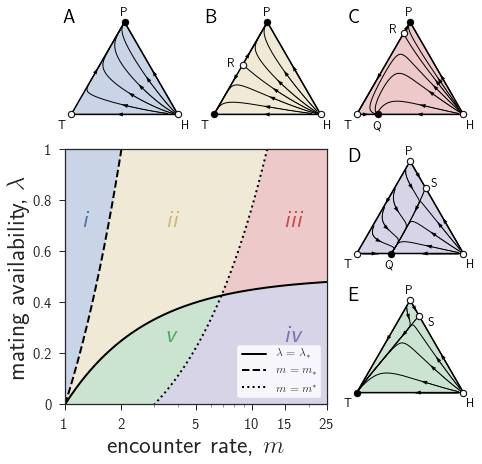

In [20]:
rho = 0.
q = .5

ms = [1.3,4.,15.,15.,4.]
ls = [.8,.8,.8,.25,.25]

fontsizelabel = 20

# default sns color palette
palette = sns.color_palette()
# rearrange colors in palette
palette[4] = sns.color_palette()[1]
palette[1] = sns.color_palette()[4]

# Plot figure with subplots of different sizes
fig = plt.figure(1,figsize=(7.25,7.25))
# set up subplot grid
gs = gridspec.GridSpec(nrows=3,ncols=3)

# large subplot
ax0 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)

plot_regions(ax = ax0,
             rho = rho,
             q = q,
             mmax = 25,
             lw = 2,
             palette = palette,
             fontsize = 15,
             mticks = [1,2,5,10,15,25]
            )

ax0.set_xlabel('encounter rate, $m$', fontsize=25)
ax0.set_ylabel('mating availability, $\lambda$', fontsize=25)
        
legend = ax0.legend(loc='lower right', frameon=True, fontsize=12)    
legend.get_frame().set_facecolor('white')

pos_labels = [[1.25,.7], [3.5,.7], [15,.7], [15,.25], [3.5,.25]]
labels = ['\emph{i}','\emph{ii}','\emph{iii}','\emph{iv}','\emph{v}']
        
# plot region labels    
for i in range(len(labels)):
    ax0.text(pos_labels[i][0],pos_labels[i][1],labels[i],color = palette[i],fontsize=25)


# small subplot
ax1 = plt.subplot2grid((3,3), (0,0))

# region i
plot_dynamics(
    ax1,
    m=ms[0],
    l=ls[0],
    rho=0.0,
    q=0.5,
    steps=10000,
    trajectoryspecs = [[[0.5,0.0,0.5],2,1],
                [[.05,0.95,0],1000,100],
                [[.005,0.99,0.005],1000,120],
                [[.02,.97,.01],1000,100],
                [[0.04,0.95,0.01],1000,95],
                [[.09,.9,.01],1000,75],
                [[0,.95,.05],1000,68]],
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=12,
    backgroundcolor=palette[0]
)

ax1.text(-1,1,'A',color = 'k',fontsize=fontsizelabel)

# small subplot
ax2 = plt.subplot2grid((3,3), (0,1))

# region ii
plot_dynamics(
    ax2,
    m=ms[1],
    l=ls[1],
    rho=rho,
    q=q,
    steps=10000,
    trajectoryspecs = [[[.6,0,.4],1000,150],
                [[.35,0,.65],1000,100],
                [[.05,.95,0],1000,210],
                [[.015, .95,1-.015-.95],1000,190],    
                [[0,.95,.05],1000,165],
                [[.0125,.9775,.01],1000,250],
                [[.021,.969,.01],1000,240],
                [[.035,.955,.01],1000,220],
                [[.08,.91,.01],1000,180]],
    edge_labels = ["R"],
    x_edge_labels = [.2],
    y_edge_labels = [.5],
    fontsize=12,
    backgroundcolor=palette[1]
)

ax2.text(-1,1,'B',color = 'k',fontsize=fontsizelabel)


# small subplot
ax3 = plt.subplot2grid((3,3), (0,2))

# region iii
plot_dynamics(
    ax3,
    m=ms[2],
    l=ls[2],
    rho=rho,
    q=q,
    steps=10000,
    trajectoryspecs = [[[0.6,0.0,0.4],1000,50],
                [[.03,0.0,.97],1000,50],
                [[.05,.95,0.0],1000,600],
                [[.95,0.05,0.0],1000,900],
                [[.01,.91,.08],1000,375],
                [[0.01,0.95,0.04],1000,500], # connecting orbit
                [[.01,.97,.02],1000,600],
                [[.01,.98,.01],1000,700],
                [[0.04,0.95,0.01],1000,600],
                [[0,0.8,0.2],1000,200]],
    edge_labels = ["R", "Q"],
    x_edge_labels = [0.36,.225],
    y_edge_labels = [.825,-.11],
    fontsize=12,
    backgroundcolor=palette[2]
)

ax3.text(-1,1,'C',color = 'k',fontsize=fontsizelabel)


# small subplot
ax4 = plt.subplot2grid((3,3), (1,2))

# region iv
plot_dynamics(
    ax4,
    m=ms[3],
    l=ls[3],
    rho=rho,
    q=q,
    steps=10000,
    trajectoryspecs = [[[.05,0,.95],3000,1350], # TP edge
                [[.95,.05,0],1000,800], # TH edge                       
                [[.05,.95,0],1000,600], # TH edge
                [[.0,.95,.05],1000,550], # HP edge
                [[.0,.05,.95],2000,500], # HP edge                       
                [[.09,.01,.9],2000,700],
                [[.29,.01,.7],2000,600],
                [[.49,.01,.5],2000,600], 
                [[.69,.01,.3],2000,600],
                [[.01,yS(ms[3],ls[3],rho)-.0015,1.-yS(ms[3],ls[3],rho)-.0075],100000,1500], # connecting orbit
                [[.01,.95,.04],1000,600],
                [[.01,.98,.01],1000,800],
                [[.04,.95,.01],1000,600]],
    edge_labels = ["S","Q"],
    x_edge_labels = [0.7,.325],
    y_edge_labels = [.68,-.11],
    fontsize=12,
    backgroundcolor=palette[3]
)

ax4.text(-1,1,'D',color = 'k',fontsize=fontsizelabel)

# small subplot
ax5 = plt.subplot2grid((3,3), (2,2))

# region v
plot_dynamics(
    ax5,
    m = ms[4],
    l = ls[4],
    rho = rho,
    q = q,
    steps = 10000,
    trajectoryspecs = [[[.05,0,.95],3000,1000], # TP edge
                [[.05,.95,0],1000,200], # TH edge                       
                [[.00001,.05,1.-.00001-.05],1000,500], # HP edge
                [[.00001,.95,1.-.00001-.95],1000,175], # PH edge
                [[.01,yS(ms[4],ls[4],rho)-.0015,1.-yS(ms[4],ls[4],rho)-.0075],10000,3700], # connecting orbit                       
                [[.07,.01,.92],2000,500],
                [[.01,.95,.04],1000,190],
                [[.01,.98,.01],1000,250],
                [[.04,.95,.01],1000,200]],
    edge_labels = ["S"],
    x_edge_labels = [0.68],
    y_edge_labels = [.68],
    fontsize = 12,
    backgroundcolor = palette[4]
)

ax5.text(-1,1,'E',color = 'k',fontsize=fontsizelabel)

plt.savefig("Fig1rho0.pdf",bbox_inches='tight') 

The following cell creates fig. 1.

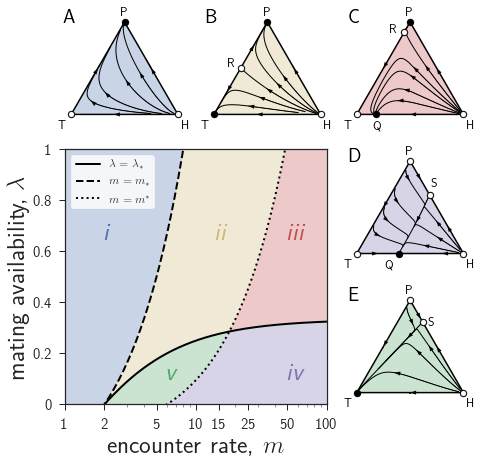

In [21]:
rho = 1.
q = .5

ms = [2,12,50,50,8]
ls = [.7,.7,.7,.1,.1]

# Fig 1 main text

# default sns color palette
palette = sns.color_palette()
# rearrange colors in palette
palette[4] = sns.color_palette()[1]
palette[1] = sns.color_palette()[4]

# Plot figure with subplots of different sizes
fig = plt.figure(1,figsize=(7.25,7.25))
# set up subplot grid
gs = gridspec.GridSpec(nrows=3,ncols=3)

# large subplot
ax0 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)

plot_regions(ax = ax0,
             rho = rho,
             q = q,
             mmax = 100,
             lw = 2,
             palette = palette,
             fontsize = 15,
             mticks = [1,2,5,10,15,25,50,100]
            )

ax0.set_xlabel('encounter rate, $m$', fontsize = 25)
ax0.set_ylabel('mating availability, $\lambda$', fontsize = 25)
        
legend = ax0.legend(loc='upper left',frameon=True,fontsize=12)    
legend.get_frame().set_facecolor('white')

pos_labels = [[2,.65], [14,.65], [50,.65], [50,.1], [6,.1]]
labels = ['\emph{i}','\emph{ii}','\emph{iii}','\emph{iv}','\emph{v}']
        
# plot region labels    
for i in range(len(labels)):
    ax0.text(pos_labels[i][0],pos_labels[i][1],labels[i],color = palette[i],fontsize=25)


# small subplot
ax1 = plt.subplot2grid((3,3), (0,0))

# region i
plot_dynamics(
    ax1,
    m=ms[0],
    l=ls[0],
    rho=rho,
    q=q,
    steps=1000,
    trajectoryspecs = [[[.5,0.0,.5],2,1], # TP edge
                [[.6,0.4,0],2,1], # TH edge                       
                [[0,.5,.5],2,1], # HP edge
                [[0.03,0.96,0.01],50,450],
                [[0.07,0.92,0.01],50,450],                       
                [[.15,.84,.01],50,450],
                [[.25,.74,.01],50,450]],
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=12,
    backgroundcolor=palette[0]
)

ax1.text(-1,1,'A',color = 'k',fontsize=fontsizelabel)

# small subplot
ax2 = plt.subplot2grid((3,3), (0,1))

# region ii
plot_dynamics(
    ax2,
    m=ms[1],
    l=ls[1],
    rho=rho,
    q=q,
    steps=1000,
    trajectoryspecs = [[[.75,0,.25],2,1], # TP edge
                [[.25,0,.75],2,1], # TP edge
                [[0,.5,.5],2,1], # HP edge                       
                [[.6,.4,0],2,1], #TH edge
                [[.015,.97,1.-.015-.97],300,250],
                [[.021,.969,.01],300,270],
                [[.035,.955,.01],300,280], # connecting orbit
                [[.13,.84,.03],300,200],                       
                [[.2,.78,.02],300,200]],    
    edge_labels = ["R"],
    x_edge_labels = [.2],
    y_edge_labels = [.5],
    fontsize=12,
    backgroundcolor=palette[1]
)

ax2.text(-1,1,'B',color = 'k',fontsize=fontsizelabel)


# small subplot
ax3 = plt.subplot2grid((3,3), (0,2))

# region iii
plot_dynamics(
    ax3,
    m=ms[2],
    l=ls[2],
    rho=rho,
    q=q,
    steps=1000,
    trajectoryspecs = [[[.5,0.0,0.5],2,1], # TP-edge
                [[.05,0.0,.95],2,1], # TP-edge
                [[.5,.5,.0],2,1], # TH-edge
                [[.01,.95,.04],1000,250], # connecting orbit
                [[.0115,.97,.0185],2000,180],                        
                [[.02,.97,.01],2000,200],
                [[.01,.98,.01],2000,200],
                [[0.04,0.95,0.01],2000,200],
                [[0,.5,.5],2,1]], # HP-edge
    edge_labels = ["R", "Q"],
    x_edge_labels = [0.36,.225],
    y_edge_labels = [.825,-.11],
    fontsize=12,
    backgroundcolor=palette[2]
)

ax3.text(-1,1,'C',color = 'k',fontsize=fontsizelabel)


# small subplot
ax4 = plt.subplot2grid((3,3), (1,2))

# region iv
plot_dynamics(
    ax4,
    m=ms[3],
    l=ls[3],
    rho=rho,
    q=q,
    steps=1000,
    trajectoryspecs = [[[.5,0,.5],2,1], # TP edge
                [[.8,.2,0],2,1], # TH edge                       
                [[.2,.8,0],2,1], # TH edge
                [[.0,.7,.3],2,1], # HP edge
                [[.0,.2,.8],2,1], # HP edge
                [[.02,yS(ms[3],ls[3],rho)-0.01,1.-yS(ms[3],ls[3],rho)-0.01],
                 100000,750], # connecting orbit                       
                [[.09,.01,.9],2000,200],
                [[.29,.01,.7],2000,200],
                [[.49,.01,.5],2000,200], 
                [[.69,.01,.3],2000,200],
                [[.01,.95,.04],2000,200],
                [[.01,.98,.01],2000,200],
                [[.04,.95,.01],2000,200]],
    edge_labels = ["S","Q"],
    x_edge_labels = [0.7,.325],
    y_edge_labels = [.68,-.11],
    fontsize=12,
    backgroundcolor=palette[3]
)

ax4.text(-1,1,'D',color = 'k',fontsize=fontsizelabel)

# small subplot
ax5 = plt.subplot2grid((3,3), (2,2))

# region v
plot_dynamics(
    ax5,
    m = ms[4],
    l = ls[4],
    rho = rho,
    q = q,
    steps = 1000,
    trajectoryspecs = [[[.5,0,.5],2,1], # TP edge
                [[.5,.5,0],2,1], # TH edge                       
                [[0,.2,.8],2,1], # HP edge
                [[0,.5,.5],2,1], # HP edge
                [[.02,yS(ms[4],ls[4],rho)-.01,1-yS(ms[4],ls[4],rho)-.01],
                 10000,700], # connecting orbit                       
                [[.07,.01,.92],2000,150],
                [[.01,.95,.04],1000,100],
                [[.01,.98,.01],1000,150],
                [[.04,.95,.01],1000,150]],
    edge_labels = ["S"],
    x_edge_labels = [0.68],
    y_edge_labels = [.68],
    fontsize = 12,
    backgroundcolor = palette[4]
)

ax5.text(-1,1,'E',color = 'k',fontsize=fontsizelabel)

plt.savefig("Fig1.pdf",bbox_inches='tight') 

The following cell creates fig. 2.

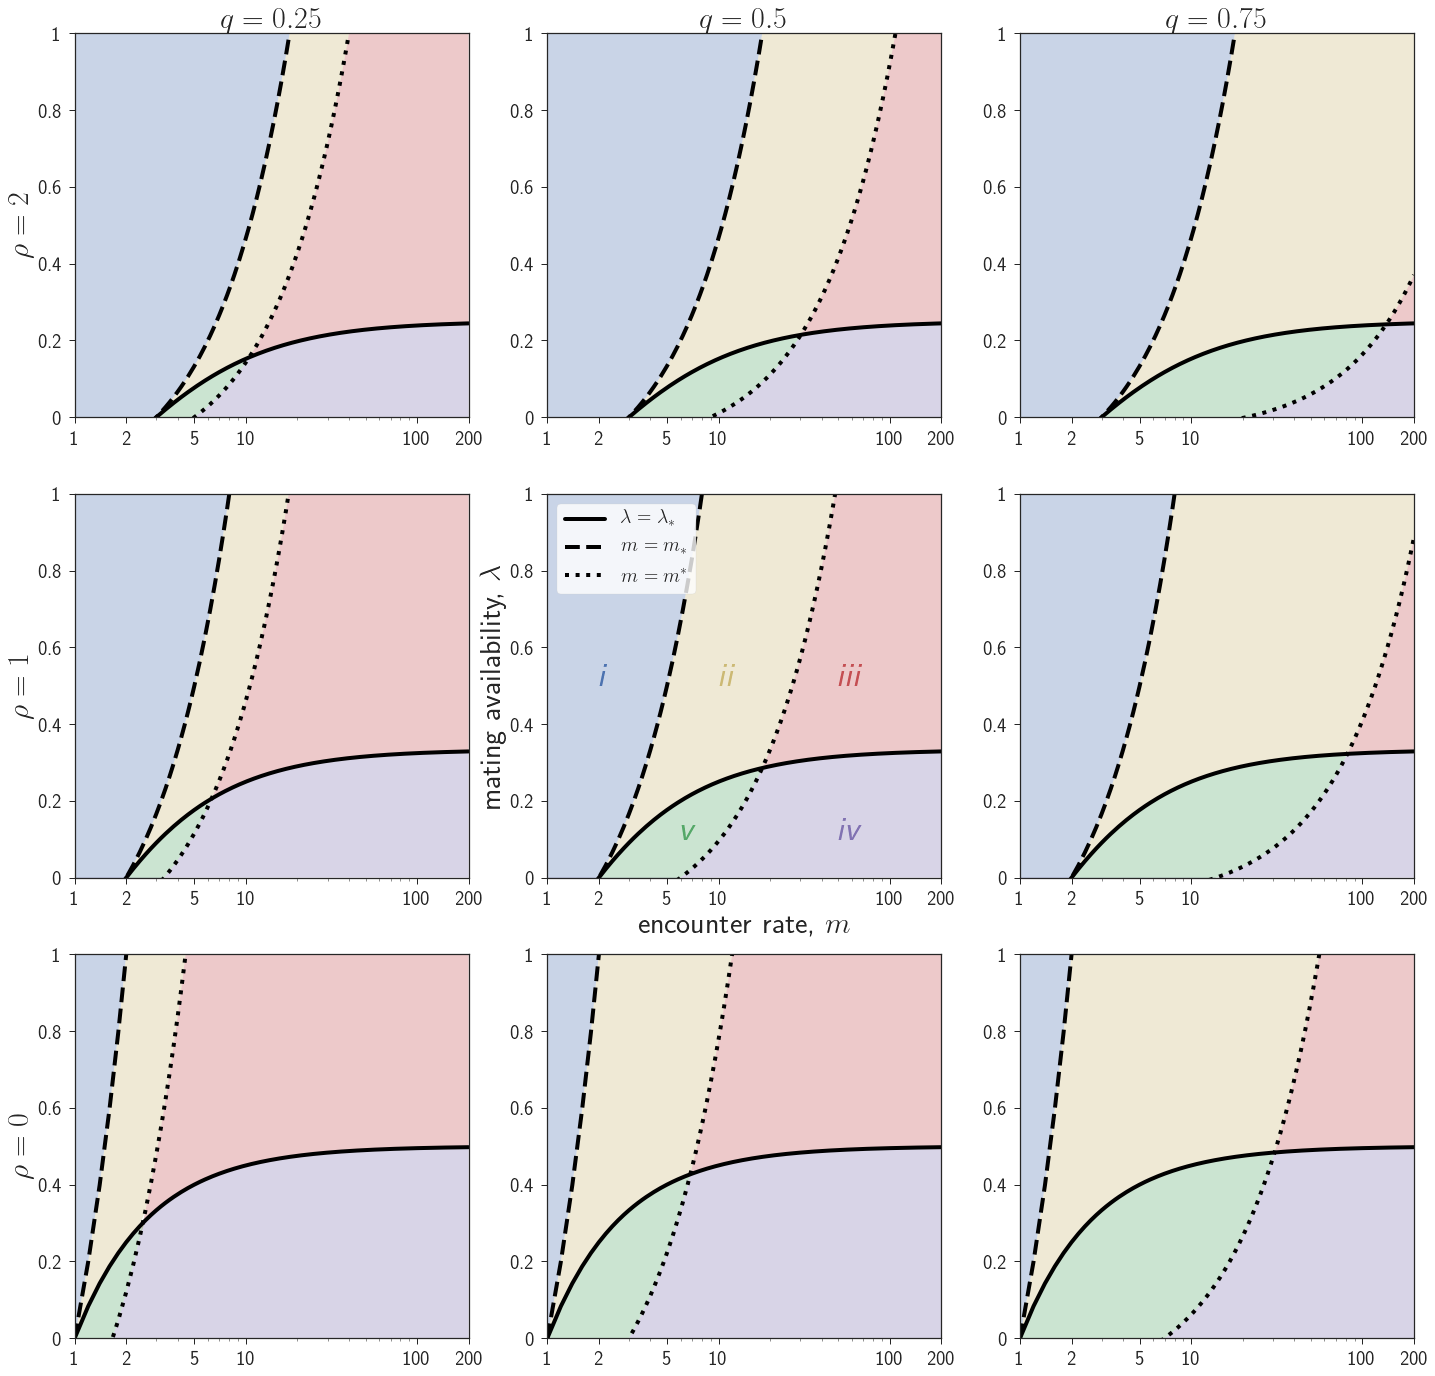

In [22]:
rhos = [2,1,0]
qs = [.25,.5,.75]

mmin = 1
mmax = 200

num = 1000

fig, axes = plt.subplots(nrows=len(rhos), ncols=len(qs), figsize=(len(qs)*8,len(rhos)*8))

for i in range(len(rhos)):
    for j in range(len(qs)):
        plot_regions(ax = axes[i,j],
             rho = rhos[i],
             q = qs[j],
             mmax = 200,
             lw = 4,
             palette = palette,
             fontsize = 20,
             mticks = [1,2,5,10,100,200]                     
            )
        # add title
        # axes[i,j].set_title('$\\rho='+str(rhos[i])+'$ , $q='+str(qs[j])+'$',fontsize=30)
        
# add labels for qs
for j in range(len(qs)):
    axes[0,j].set_title('$q='+str(qs[j])+'$',fontsize=30)

# add labels for qs
for i in range(len(rhos)):
    axes[i,0].set_ylabel('$\\rho='+str(rhos[i])+'$',fontsize=30,rotation='vertical')
    
axes[1,1].set_xlabel('encounter rate, $m$',fontsize=30)
axes[1,1].set_ylabel('mating availability, $\lambda$',fontsize=30)

legend = axes[1,1].legend(loc='upper left',frameon=True,fontsize=20)
legend.get_frame().set_facecolor('white')
        
pos_labels = [[2,.5], [10,.5], [50,.5], [50,.1], [6,.1]]
labels = ['\emph{i}','\emph{ii}','\emph{iii}','\emph{iv}','\emph{v}']
        
# plot region labels    
for i in range(len(labels)):
    axes[1,1].text(pos_labels[i][0],pos_labels[i][1],labels[i],color = palette[i],fontsize=35)

plt.savefig('Fig2.pdf',bbox_inches='tight')

The following cell creates fig. B1 (Appendix B).

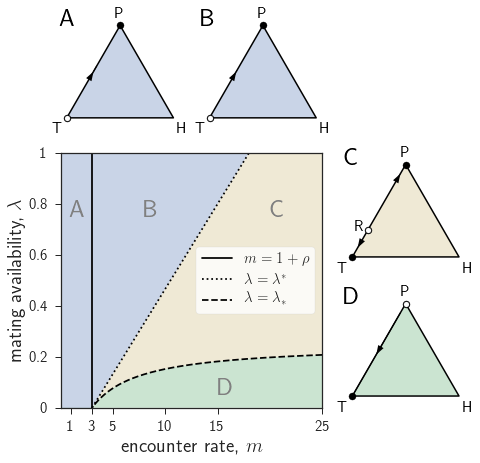

In [23]:
rho = 2
q = 0.5

m = np.array([.8,8.,20.,15.])
l = np.array([.75,.75,.75,.05])

fontsize = 20
fontsizelabel = 25
fontsizelegend = 15

# default sns color palette
palette = sns.color_palette()
# rearrange colors in palette
palette[4] = sns.color_palette()[1]
palette[1] = sns.color_palette()[4]

# Plot figure with subplots of different sizes
fig = plt.figure(1,figsize=(7.25,7.25))
# set up subplot grid
gs = gridspec.GridSpec(nrows=3,ncols=3)

# large subplot

ax0 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)

mmin = 0
mmax = 25
num = 1000

ms = np.linspace(mmin, mmax, num=num)

l1 = lambdasubstar(ms,rho)
l2 = lambdasuperstar(ms,rho)

ax0.axvline(x=1+rho,ymin=0,ymax=1,color='k',label='$m=1+\\rho$',ls='-')
ax0.plot(ms,l2,color='k',label='$\lambda=\lambda^*$',ls=':')
ax0.plot(ms,l1,color='k',label='$\lambda=\lambda_*$',ls='--')

ax0.fill_between(ms, l2, 1, facecolor = palette[0], interpolate=True, alpha = 0.3)
ax0.fill_between(ms, l1, l2, facecolor = palette[1], interpolate=True, alpha = 0.3)
ax0.fill_between(ms, 0, l1, facecolor = palette[4], interpolate=True, alpha = 0.3)

ax0.set_xlim((mmin,mmax))
ax0.set_ylim((0,1))

ax0.set_xticks([1,3,5,10,15,mmax])
ax0.set_xticklabels([1,3,5,10,15,mmax],fontsize = fontsizelegend,rotation = 'horizontal')
ax0.set_xlabel('encounter rate, $m$', fontsize = fontsize)

ax0.set_yticks([0,.2,.4,.6,.8,1])    
ax0.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = fontsizelegend)
ax0.set_ylabel('mating availability, $\lambda$', fontsize = fontsize)

legend = ax0.legend(frameon=True,fontsize=15)
legend.get_frame().set_facecolor('white')


#ax0.scatter(m,l)
letters = ['A','B','C','D']
for i in range(len(m)):
    ax0.text(m[i],l[i],letters[i],fontsize=25,color='gray')

# small subplot
ax1 = plt.subplot2grid((3,3), (0,0))

# region 1
plot_dynamics(
    ax1,
    m=m[0],
    l=l[0],
    rho=rho,
    q=q,
    plot_type = 'TP-edge',
    steps=10000,
    trajectoryspecs = [[[.5,0,.5],2,1]],
    head_width_arrows = .1,    
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=fontsizelegend,
    backgroundcolor=palette[0]
)

ax1.text(-1,1,'A',color = 'k',fontsize=fontsizelabel)

# small subplot
ax2 = plt.subplot2grid((3,3), (0,1))

# region 3
plot_dynamics(
    ax2,
    m=m[1],
    l=l[1],
    rho=rho,
    q=q,
    plot_type = 'TP-edge',    
    steps=10000,
    trajectoryspecs = [[[.5,0,.5],2,1]],
    head_width_arrows = .1,
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=fontsizelegend,
    backgroundcolor=palette[0]
)

ax2.text(-1,1,'B',color = 'k',fontsize=fontsizelabel)

# small subplot
ax4 = plt.subplot2grid((3,3), (1,2))

# region 4
plot_dynamics(
    ax4,
    m=m[2],
    l=l[2],
    rho=rho,
    q=q,
    plot_type = 'TP-edge',    
    steps=10000,
    trajectoryspecs = [[[.1,0.,.9],2,1],
                      [[.9,0.,.1],2,1]],
    head_width_arrows = .1,
    edge_labels = ['R'],
    x_edge_labels = [0.115],
    y_edge_labels = [0.28],
    fontsize=fontsizelegend,
    backgroundcolor=palette[1]
)

ax4.text(-1,1,'C',color = 'k',fontsize=fontsizelabel)

# small subplot
ax5 = plt.subplot2grid((3,3), (2,2))

# region 2
plot_dynamics(
    ax5,
    m = m[3],
    l = l[3],
    rho = rho,
    q = q,
    plot_type = 'TP-edge',    
    steps = 10000,
    trajectoryspecs = [[[.1,0,.9],10000,2000]],
    head_width_arrows = .1,
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize = fontsizelegend,
    backgroundcolor = palette[4]
)

ax5.text(-1,1,'D',color = 'k',fontsize=fontsizelabel)

plt.savefig("FigB1.pdf",bbox_inches='tight') 

The following cell creates fig. B2 (Appendix B).

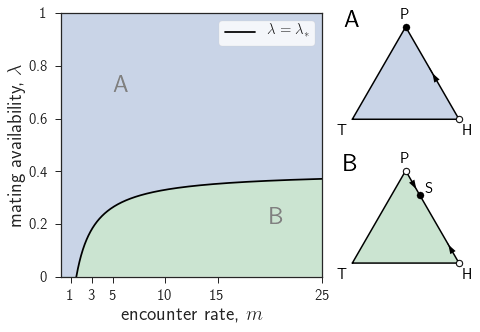

In [24]:
rho = 0.5
q = 0.5

m = np.array([5,20])
l = np.array([.7,.2])

fontsize = 20
fontsizelabel = 25
fontsizelegend = 15

# default sns color palette
palette = sns.color_palette()
# rearrange colors in palette
palette[4] = sns.color_palette()[1]
palette[1] = sns.color_palette()[4]

# Plot figure with subplots of different sizes
fig = plt.figure(1,figsize=(7.25,4.85))
# set up subplot grid
gs = gridspec.GridSpec(nrows=2,ncols=3)

# large subplot

ax0 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2)

mmin = 0
mmax = 25
num = 1000

ms = np.linspace(mmin, mmax, num=num)

l1 = lambdasubstar(ms,rho)

ax0.plot(ms,l1,color='k',label='$\lambda=\lambda_*$',ls='-')

ax0.fill_between(ms, l1, 1, facecolor = palette[0], interpolate=True, alpha = 0.3)
ax0.fill_between(ms, 0, l1, facecolor = palette[4], interpolate=True, alpha = 0.3)

ax0.set_xlim((mmin,mmax))
ax0.set_ylim((0,1))

ax0.set_xticks([1,3,5,10,15,mmax])
ax0.set_xticklabels([1,3,5,10,15,mmax],fontsize = fontsizelegend,rotation = 'horizontal')
ax0.set_xlabel('encounter rate, $m$', fontsize = fontsize)

ax0.set_yticks([0,.2,.4,.6,.8,1])    
ax0.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = fontsizelegend)
ax0.set_ylabel('mating availability, $\lambda$', fontsize = fontsize)


legend = ax0.legend(frameon=True,fontsize=15)
legend.get_frame().set_facecolor('white')


#ax0.scatter(m,l)
letters = ['A','B']
for i in range(len(m)):
    ax0.text(m[i],l[i],letters[i],fontsize=25,color='gray')

# small subplot
ax1 = plt.subplot2grid((2,3), (0,2))

# region 1
plot_dynamics(
    ax1,
    m=m[0],
    l=l[0],
    rho=rho,
    q=q,
    plot_type = 'HP-edge',
    steps=10000,
    trajectoryspecs = [[[0.,.5,.5],2,1]],
    head_width_arrows = .1,    
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=fontsizelegend,
    backgroundcolor=palette[0]
)

ax1.text(-1,1,'A',color = 'k',fontsize=fontsizelabel)

# small subplot
ax2 = plt.subplot2grid((2,3), (1,2))

# region 2
plot_dynamics(
    ax2,
    m=m[1],
    l=l[1],
    rho=rho,
    q=q,
    plot_type = 'HP-edge',    
    steps=1000,
    trajectoryspecs = [[[0.,0.8,.2],2,1],
                      [[0.,0.2,.8],2,1]],
    head_width_arrows = .1,
    edge_labels = ['S'],
    x_edge_labels = [.7],
    y_edge_labels = [.7],
    fontsize=fontsizelegend,
    backgroundcolor=palette[4]
)

ax2.text(-1,1,'B',color = 'k',fontsize=fontsizelabel)

plt.savefig("FigB2.pdf",bbox_inches='tight') 

The following cell creates fig. B3 (Appendix B).

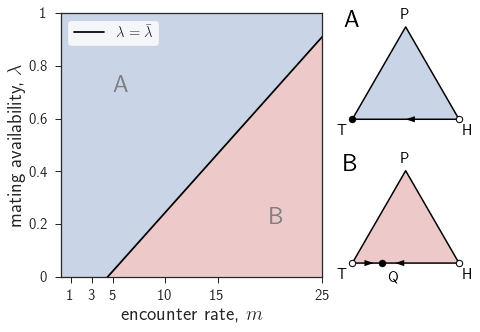

In [25]:
rho = 0.5
q = 0.5

m = np.array([5,20])
l = np.array([.7,.2])

fontsize = 20
fontsizelabel = 25
fontsizelegend = 15

# default sns color palette
palette = sns.color_palette()
# rearrange colors in palette
palette[4] = sns.color_palette()[1]
palette[1] = sns.color_palette()[4]

# Plot figure with subplots of different sizes
fig = plt.figure(1,figsize=(7.25,4.85))
# set up subplot grid
gs = gridspec.GridSpec(nrows=2,ncols=3)

# large subplot

ax0 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2)

mmin = 0
mmax = 25
num = 1000

ms = np.linspace(mmin, mmax, num=num)

l1 = lambdabar(ms,rho,q)

ax0.plot(ms,l1,color='k',label='$\lambda=\\bar{\lambda}$',ls='-')

ax0.fill_between(ms, l1, 1, facecolor = palette[0], interpolate=True, alpha = 0.3)
ax0.fill_between(ms, 0, l1, facecolor = palette[2], interpolate=True, alpha = 0.3)

ax0.set_xlim((mmin,mmax))
ax0.set_ylim((0,1))

ax0.set_xticks([1,3,5,10,15,mmax])
ax0.set_xticklabels([1,3,5,10,15,mmax],fontsize = fontsizelegend,rotation = 'horizontal')
ax0.set_xlabel('encounter rate, $m$', fontsize = fontsize)

ax0.set_yticks([0,.2,.4,.6,.8,1])    
ax0.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = fontsizelegend)
ax0.set_ylabel('mating availability, $\lambda$', fontsize = fontsize)

legend = ax0.legend(frameon=True,fontsize=15)
legend.get_frame().set_facecolor('white')


#ax0.scatter(m,l)
letters = ['A','B']
for i in range(len(m)):
    ax0.text(m[i],l[i],letters[i],fontsize=25,color='gray')

# small subplot
ax1 = plt.subplot2grid((2,3), (0,2))

# region 1
plot_dynamics(
    ax1,
    m=m[0],
    l=l[0],
    rho=rho,
    q=q,
    plot_type = 'TH-edge',
    steps=1000,
    trajectoryspecs = [[[0.5,.5,0.],2,1]],
    head_width_arrows = .1,    
    edge_labels = [],
    x_edge_labels = [],
    y_edge_labels = [],
    fontsize=fontsizelegend,
    backgroundcolor=palette[0]
)

ax1.text(-1,1,'A',color = 'k',fontsize=fontsizelabel)

# small subplot
ax2 = plt.subplot2grid((2,3), (1,2))

# region 2
plot_dynamics(
    ax2,
    m=m[1],
    l=l[1],
    rho=rho,
    q=q,
    plot_type = 'TH-edge',    
    steps=1000,
    trajectoryspecs = [[[0.6,0.4,0],2,1],
                      [[0.8,0.2,0],2,1]],
    head_width_arrows = .1,
    edge_labels = ['Q'],
    x_edge_labels = [.4],
    y_edge_labels = [-.15],
    fontsize=fontsizelegend,
    backgroundcolor=palette[2]
)

ax2.text(-1,1,'B',color = 'k',fontsize=fontsizelabel)

plt.savefig("FigB3.pdf",bbox_inches='tight') 

The following cell creates fig. B4 (Appendix B).

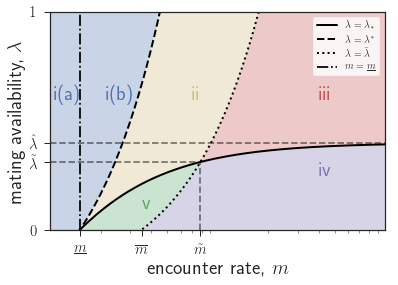

In [28]:
rho = 0.5 # egg sensecence
q = 0.4 # probability of cheating detection

fig, (ax) = plt.subplots(nrows=1, ncols=1)

[line1, line2, line3] = plot_regions(ax = ax,
             rho = rho,
             q = q,
             mmax = 100,
             lw = 2,
             palette = palette,
             fontsize = 15,
             mticks = [1,2,5,10,15,25,50,100]
            )

ax.set_xlabel('encounter rate, $m$', fontsize=25)
ax.set_ylabel('mating availability, $\lambda$', fontsize=25)
    
l1 = lambdasubstar(m,rho)
l2 = lambdasuperstar(m,rho)
l3 = lambdabar(m,rho,q)
l4 = lambdahat(rho)
l5 = lambdatilde(rho,q)

m1 = munderline(rho)
m2 = moverline(rho,q)
m3 = mtilde(rho,q)

line4 = ax.vlines(x=m1,ymin=0,ymax=1,linestyle='-.',color='k')
ax.vlines(x=m3,ymin=0,ymax=l5,linestyle='--',color='k',alpha=0.5)
ax.hlines(y=l4,xmin=1,xmax=100,linestyle='--',color='k',alpha=0.5)
ax.hlines(y=l5,xmin=1,xmax=m3,linestyle='--',color='k',alpha=0.5)

line1.set_label('$\lambda = \lambda_{*}$')
line2.set_label('$\lambda = \lambda^{*}$')
line3.set_label('$\lambda = \\bar{\lambda}$')
line4.set_label('$m = \\underline{m}$')

legend = ax.legend(loc='upper right', frameon=True, fontsize=10)    
legend.get_frame().set_facecolor('white')

ax.set_xticks([m1,m2,m3])
ax.set_xticklabels(['$\\underline{m}$','$\\overline{m}$','$\\tilde{m}$'], fontsize = fontsizelegend, rotation = 'horizontal')
ax.set_xlabel('encounter rate, $m$', fontsize = fontsize)

ax.set_yticks([0,l5,l4,1])
ax.set_yticklabels(['$0$','$\\tilde{\lambda}$','$\hat{\lambda}$','$1$'],fontsize=fontsizelegend)
ax.set_ylabel('mating availability, $\lambda$', fontsize = fontsize)

pos_labels = [[1.05,.6], [2.15,.6], [7,.6],[40,.6],[40,.25], [3.5,.1]]
labels = ['i(a)','i(b)','ii','iii','iv','v']
        
# plot region labels    
ax.text(pos_labels[0][0],pos_labels[0][1],labels[0],color = palette[0],fontsize=20)
ax.text(pos_labels[1][0],pos_labels[1][1],labels[1],color = palette[0],fontsize=20)
ax.text(pos_labels[2][0],pos_labels[2][1],labels[2],color = palette[1],fontsize=20)
ax.text(pos_labels[3][0],pos_labels[3][1],labels[3],color = palette[2],fontsize=20)
ax.text(pos_labels[4][0],pos_labels[4][1],labels[4],color = palette[3],fontsize=20)
ax.text(pos_labels[5][0],pos_labels[5][1],labels[5],color = palette[4],fontsize=20)

plt.savefig('FigB4.pdf',bbox_inches='tight')